In [55]:
!pip uninstall basemap

In [56]:
#!pip install matplotlib
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     


In [57]:
df = pd.read_csv("DATA/VUELOS2023.csv")

df.sample(5)

,AÑO,MES,AEROLINEA,IATA_BASE,TIPO_DE_VUELO,FLOTA,Ejecución
346,2023,Marzo,SPIRIT,CLO,Transito,A320,31
161,2023,Abril,AVIANCA,BOG,Parqueo,A330,0
281,2023,Junio,IBERIA,BOG,Base,A350/9,13
256,2023,Marzo,AVIATECA,BOG,Transito,A320,4
297,2023,Marzo,SPIRIT,BOG,Transito,A320,62


In [58]:
df.dtypes #Check data types

AÑO               int64
MES              object
AEROLINEA        object
IATA_BASE        object
TIPO_DE_VUELO    object
FLOTA            object
Ejecución         int64
dtype: object

In [59]:
IATA = pd.read_excel("DATA/IATA.xlsx")
print(gdf)

   IATA_BASE    Latitud   Longitud
0        AXM   4.453300 -75.765800
1        BAQ  10.886602 -74.776425
2        BGA   7.126630 -73.182722
3        BOG   4.698779 -74.141384
4        CLO   3.539800 -76.385400
5        CTG  10.441670 -75.512940
6        IBE   4.422215 -75.135130
7        IPI   0.858854 -77.674497
8        MDE   6.166408 -75.423946
9        MTR   8.823772 -75.825151
10       NVA   2.951323 -75.293674
11       PEI   4.813172 -75.739178
12       PPN   2.453409 -76.609509
13       PSO   1.396250 -77.291500


In [60]:
merged_df = pd.merge(df,IATA,on='IATA_BASE')
merged_df.sample(5)

,AÑO,MES,AEROLINEA,IATA_BASE,TIPO_DE_VUELO,FLOTA,Ejecución,Latitud,Longitud
185,2023,Mayo,AVIANCA,BOG,Transito,A319,477,4.698779,-74.141384
49,2023,Junio,AEROLINEAS ARGENTINAS,BOG,Transito,B737,26,4.698779,-74.141384
318,2023,Febrero,TURKISH,BOG,Transito,B777,28,4.698779,-74.141384
1,2023,Febrero,SPIRIT,AXM,Transito,A320,12,4.453300,-75.765800
53,2023,Enero,AEROLINEAS GALAPAGOS,BOG,Base,A320,11,4.698779,-74.141384


In [65]:
gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['Longitud'], merged_df['Latitud']))
gdf.crs = "EPSG:4326"

C:\Users\Analista Metricas\AppData\Local\Temp\ipykernel_15244\1410014119.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


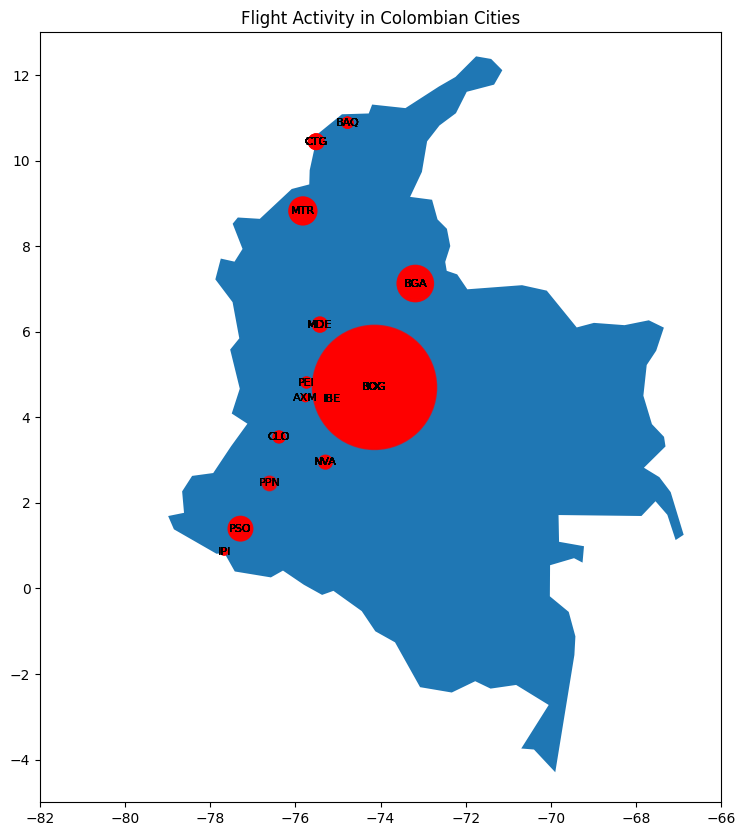

In [79]:
# Set up the map projection using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
colombia = world[world['name'] == 'Colombia']
ax = colombia.plot(figsize=(10, 10))

# Plot the cities with points sized based on the number of flights
gdf.plot(ax=ax, markersize=gdf['Ejecución'] * 2, color='red', alpha=0.7)

# Set the extent of the map to focus on Colombia
ax.set_xlim(-82, -66)
ax.set_ylim(-5, 13)

# Add annotations for each city with IATA code only
for x, y, iata in zip(gdf.geometry.x, gdf.geometry.y, gdf['IATA_BASE']):
    plt.text(x, y, iata, fontsize=8, ha='center', va='center')

# Add a title to the plot
plt.title("Flight Activity in Colombian Cities")

# Show the plot
plt.show()

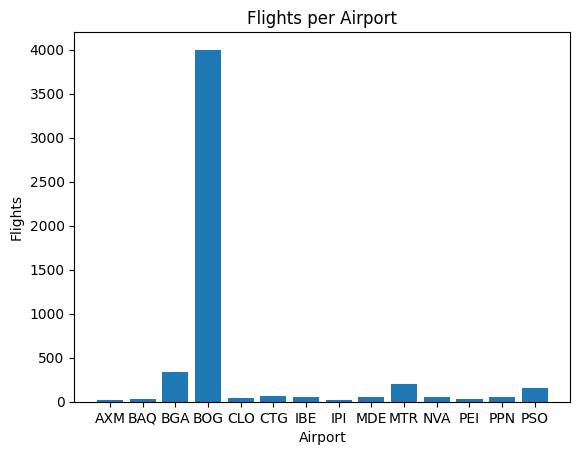

In [96]:
plt.bar(merged_df['IATA_BASE'],merged_df['Ejecución'])
plt.xlabel('Airport')
plt.ylabel('Flights')
plt.title('Flights per Airport')
plt.show()